In [1]:
import numpy as np
import scipy.integrate
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

# Exercise 1

### (a) Mathematical Model

In [3]:
def dydt(t,y,k1,k2,k3,k4):
    
    A, B, C, D = y
    
    dAdt = -k1*A*B+k4*D
    dBdt = -k2*B+k1*A*B
    dCdt = -k3*C+k2*B
    dDdt = -k4*D+k3*C

    return (dAdt, dBdt, dCdt, dDdt)

# Mathematical prediction

def steady_state(Xo,k1,k2,k3,k4):
    sA = k2/k1
    sB = (Xo-(k2/k1))/(1+(k2/k3)+(k2/k4))
    sC = sB*k2/k3
    sD = sB*k2/k4

    return (sA, sB, sC, sD)

#### Set initial parameters

In [6]:
# Species
A0, B0, C0, D0 = 8, 1, 0.5, 0.5

# Reaction Constants
k1, k2, k3, k4 = 1, 1, 1, 10

### (b) Simulation and plotting

In [10]:
# Integrate and simulate using ODE's

dydt_withks = lambda t,y: dydt(t,y,k1,k2,k3,k4)

start = timer()
solution = scipy.integrate.solve_ivp(dydt_withks, t_span=(0,1000), y0=(A0,B0,C0,D0), method='RK45', rtol=1e-6)
end = timer()
time_for_num_int_by_ode45 = end-start
print("Time for ODE45, ",   time_for_num_int_by_ode45)

t_ode45 = solution.t
A_ode45 = solution.y[0]
B_ode45 = solution.y[1]
C_ode45 = solution.y[2]
D_ode45 = solution.y[3]

print("Equilibrium points of A, B, C, D:")
print(f"A: {A_ode45[-1]}, B: {B_ode45[-1]}, C: {C_ode45[-1]}, D: {D_ode45[-1]}")

# Calculate steady states using the steady state calculations for comparison
steady_state_prediction = steady_state(A0 + B0 + C0 + D0, k1, k2, k3, k4)
print("Steady states from the function:")
print(f"A: {steady_state_prediction[0]}, B: {steady_state_prediction[1]}, C: {steady_state_prediction[2]}, D: {steady_state_prediction[3]}")

Time for ODE45,  0.286067400011234
Equilibrium points of A, B, C, D:
A: 1.0000005615200986, B: 4.285714046862642, C: 4.285714312034, D: 0.4285710795832274
Steady states from the function:
A: 1.0, B: 4.285714285714286, C: 4.285714285714286, D: 0.42857142857142855


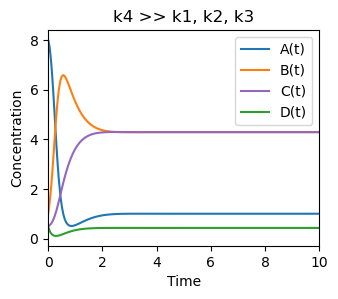

In [12]:
fig = plt.figure(figsize=(3.5, 2.8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t_ode45, (A_ode45), color='tab:blue',label='A(t)')
ax.plot(t_ode45, (B_ode45), color='tab:orange',label='B(t)')
ax.plot(t_ode45, (C_ode45), color='tab:purple',label='C(t)')
ax.plot(t_ode45, (D_ode45), color='tab:green',label='D(t)')
plt.xlim(0, 10)
ax.set_title('k4 >> k1, k2, k3')
ax.set_xlabel('Time')
ax.set_ylabel('Concentration')
ax.legend() 
plt.show()

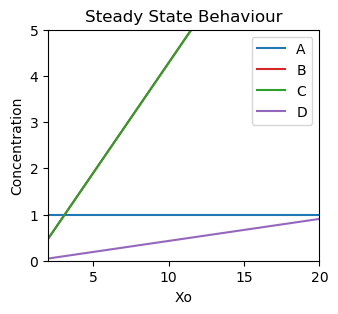

In [14]:
## Plot in regards to Xo at the steady state
Xo_values = np.linspace(0,20,10)

A = np.full_like(Xo_values, k2/k1)
B = (Xo_values-(k2/k1))/(1+(k2/k3)+(k2/k4))
C = B*k2/k3
D = B*k2/k4

fig = plt.figure(figsize=(3.5, 3))
ax = fig.add_subplot(1, 1, 1)
ax.plot(Xo_values, A, color='tab:blue',label='A')
ax.plot(Xo_values, B, color='tab:red',label='B')
ax.plot(Xo_values, C, color='tab:green',label='C')
ax.plot(Xo_values, D, color='tab:purple',label='D')
ax.set_title('Steady State Behaviour')
plt.xlim(2, 20)
plt.ylim(0,5)
ax.set_xlabel('Xo')
ax.set_ylabel('Concentration')
ax.legend()
plt.show()

# Exercise 2

### (a) Mathematical Model

In [89]:
def dydt_2(t,y,S,kfa,ka,kfi,ki,kf,kr):
    
    A, I = y
    
    dAdt = kfa*S*(AT-A)-ka*A
    dIdt = kfi*S*(IT-I)-ki*I
    dRdt = kf*A-kr*I

    return (dAdt, dIdt)

def steady_state_2(S,AT,IT,kfa,ka,kfi,ki,kf,kr):
    sA = (kfa*S*AT)/(kfa*S+ka)
    sI = (kfi*S*IT)/(kfi*S+ki)
    sR = kf*sA-kr*sI

    return (sA, sI, sR)

#### Set initial parameters

In [92]:
# Species
AT, IT, A, I  = 1, 1, 0, 0

# Constants
kfa, ka, kfi, ki, kf, kr = 1, 0.5, 0.4, 0.8, 1, 0.8

# Signal
S=1

### (b) Simulation and plotting

In [95]:
dydt_withks_2 = lambda t,y: dydt_2(t,y,S,kfa,ka,kfi,ki,kf,kr)

start = timer()
solution = scipy.integrate.solve_ivp(dydt_withks_2, t_span=(0,100), y0=(A,I), method='RK45', rtol=1e-6)
end = timer()
time_for_num_int_by_ode45 = end-start
print("Time for ODE45, ",   time_for_num_int_by_ode45)

t_ode45 = solution.t
A_ode45 = solution.y[0]
I_ode45 = solution.y[1]
R_ode45 = kf*A_ode45-kr*I_ode45

print("Equilibrium points of A, I, R:")
print(f"A: {A_ode45[-1]}, I: {I_ode45[-1]}, R: {R_ode45[-1]}")


# Calculate steady states using your function for comparison
steady_state_prediction = steady_state_2(S, AT, IT, kfa, ka, kfi, ki, kf, kr)
print("Steady states from the function:")
print(f"A: {steady_state_prediction[0]}, I: {steady_state_prediction[1]}, R: {steady_state_prediction[2]}")


Time for ODE45,  0.01337599998805672
Equilibrium points of A, I, R:
A: 0.6666663913925527, I: 0.33333333333333337, R: 0.39999972472588596
Steady states from the function:
A: 0.6666666666666666, I: 0.3333333333333333, R: 0.39999999999999997


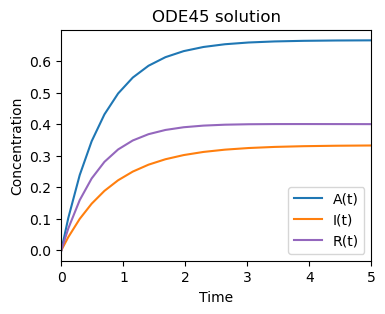

In [97]:
fig_2 = plt.figure(figsize=(4, 3))
ax = fig_2.add_subplot(1, 1, 1)
ax.plot(t_ode45, (A_ode45), color='tab:blue',label='A(t)')
ax.plot(t_ode45, (I_ode45), color='tab:orange',label='I(t)')
ax.plot(t_ode45, (R_ode45), color='tab:purpble',label='R(t)')
plt.xlim(0, 20)
ax.set_title('ODE45 solution')
ax.set_xlabel('Time')
ax.set_ylabel('Concentration')
ax.legend() 
plt.show()

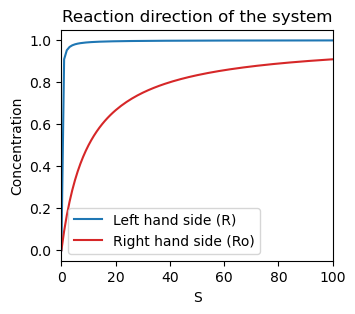

In [149]:
# Species
AT, IT  = 1, 1

# Constants
kfa, ka, kfi, ki, kf, kr = 1, 0.1, 0.1, 1, 1, 1

S_values = np.linspace(0,1000,1000)

L_H_S = (kf*kfa*S_values*AT)/(kfa*S_values+ka)
R_H_S = (kr*kfi*S_values*IT)/(kfi*S_values+ki)


fig_2 = plt.figure(figsize=(3.5, 3))
ax = fig_2.add_subplot(1, 1, 1)
ax.plot(S_values, L_H_S, color='tab:blue',label='Left hand side (R)')
ax.plot(S_values, R_H_S, color='tab:red',label='Right hand side (Ro)')
plt.xlim(0,100)
ax.set_title('Reaction direction of the system')
ax.set_xlabel('S')
ax.set_ylabel('Concentration')
ax.legend()
plt.show()